In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## 1.EXPLORACIÓN DE LA BASE DE DATOS ##
data = pd.read_csv('final.csv')
data=data.drop("serial", axis=1)
data=data.drop("labels", axis=1)
data=data.drop("stations", axis=1)
data = data.round(2)
print(data.head())
print("_____________________________________________")
print(data.info())
print("_____________________________________________")
print(data.describe())

   tempmax  tempmin   temp  feelslikemax  feelslikemin  feelslike    dew  \
0    34.05    24.48  28.71         39.76         25.32      32.31  22.97   
1    34.09    25.69  29.46         41.34         28.14      34.42  23.48   
2    34.57    25.42  29.53         40.46         26.56      33.09  22.58   
3    33.02    25.08  28.73         37.88         26.19      31.77  21.75   
4    30.66    24.23  26.77         36.59         24.26      28.94  24.21   

   humidity  precip  precipprob  ...  windspeed  winddir  sealevelpressure  \
0     73.51    2.92       44.66  ...      15.68   175.60           1007.91   
1     72.07    3.78       39.84  ...      14.57   158.35           1003.53   
2     69.42    3.07       33.33  ...      14.98   202.62           1005.73   
3     69.30    6.03       37.40  ...      16.50   183.54           1003.36   
4     86.65   23.34       96.75  ...      19.55   224.03           1010.00   

   cloudcover  visibility  solarradiation  solarenergy  uvindex  condition

_______________________________________
cases               1.000000
feelslike           0.415349
temp                0.378157
feelslikemin        0.376018
windspeed           0.372894
tempmin             0.364696
feelslikemax        0.304084
tempmax             0.284181
visibility          0.248551
dew                 0.179927
winddir             0.023418
precip             -0.015553
sealevelpressure   -0.016806
cloudcover         -0.189714
humidity           -0.208193
solarradiation     -0.215880
solarenergy        -0.217348
precipprob         -0.222055
uvindex            -0.225523
precipcover        -0.236217
conditions         -0.437429
snow                     NaN
snowdepth                NaN
Name: cases, dtype: float64
_______________________________________


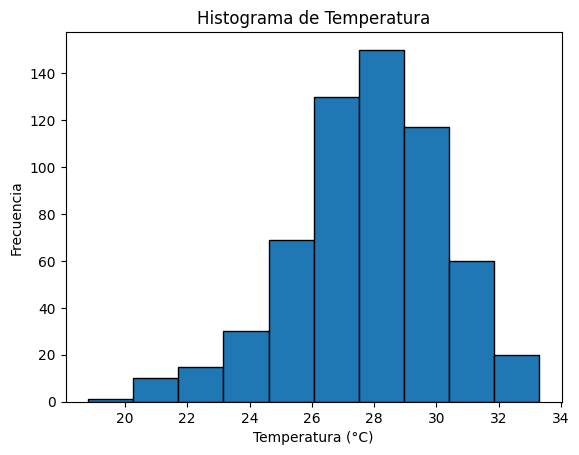

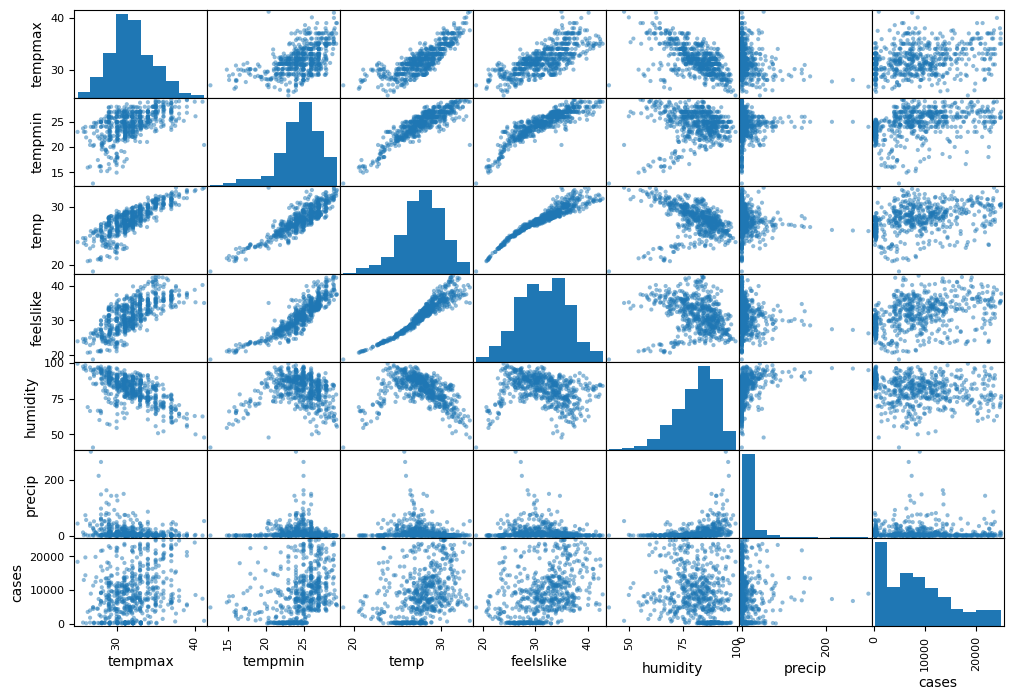

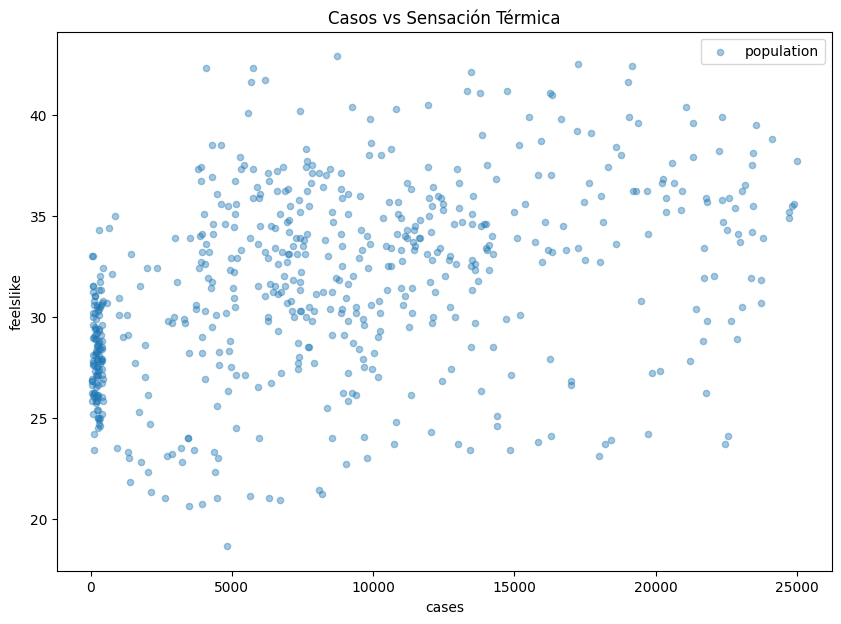

In [3]:
## 2. VISUALIZACIÓN DE DATOS ##
# Diagrama de Caja
fig = px.box(data, x='cases', title='Diagrama de Caja')
fig.show()

# Gráfica de Barras
fig = plt.hist(data['temp'], bins=10, edgecolor='black')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Temperatura')

## 3. CORRELACIONES ##
attributes = ["tempmax", "tempmin","temp", "feelslike", "humidity", "precip", "cases"]
scatter_matrix(data[attributes], figsize=(12, 8))

corr_matrix = data.corr()
print("_______________________________________")
print(corr_matrix["cases"].sort_values(ascending=False))
print("_______________________________________")

data.plot(kind="scatter", x='cases', y='feelslike', title='Casos vs Sensación Térmica', alpha=0.4, label="population", figsize=(10,7))
plt.legend()

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_labels = data["cases"].copy()
data = data.drop("cases", axis=1)
print(data_labels)

#Custom Transformers
#Añade nuevos atributos a partir de la combinación de otros ya existentes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_temp_humidity=True):
        self.add_temp_humidity = add_temp_humidity

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_temp = X.copy()
        if self.add_temp_humidity:
            X_temp['temp_humidity'] = X_temp['temp'] * X_temp['humidity']
        return X_temp
# PCA
pca_pipeline = Pipeline([
    ('attribs_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.97))
])

data_prepared_pca = pca_pipeline.fit_transform(data)

X_train, X_val, y_train, y_val = train_test_split(data_prepared_pca, data_labels, test_size=0.2, random_state=42)

0       4925.0
1       5077.0
2       7579.0
3      13706.0
4         82.0
        ...   
597     6729.0
598    10541.0
599     6396.0
600    10883.0
601     7311.0
Name: cases, Length: 602, dtype: float64


MAE: 4253.58, MSE: 29010013.93, R²: 0.30, RMSE: 5386.09


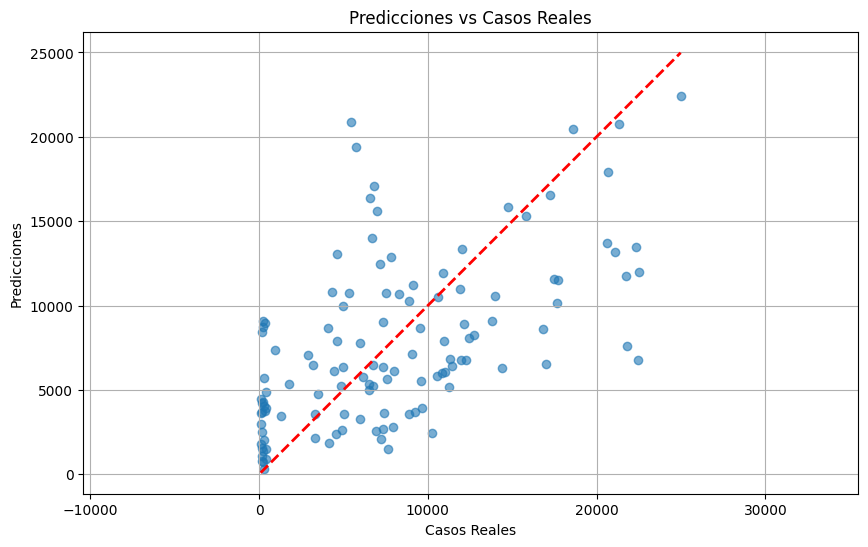

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Inicializamos el MLPRegressor (Red Neuronal Perceptrón Multicapa)
mlp_regressor = MLPRegressor(hidden_layer_sizes=(1000, 500), max_iter=10000,early_stopping=True, random_state=42)
# Entrenamos el modelo
mlp_regressor.fit(X_train, y_train)
# Realizar predicciones
y_pred = mlp_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}, RMSE: {rmse:.2f}")

y_pred = mlp_regressor.predict(X_val)
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linewidth=2, linestyle='--')
plt.xlabel('Casos Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Casos Reales')
plt.axis('equal')
plt.grid()
plt.show()


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'batch_size': 32, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best cross-validation score:  -34898297.73323286
Best RMSE:  5386.094497095892
Best MAE:  4253.576402705314
Best R²:  0.30192542660425814


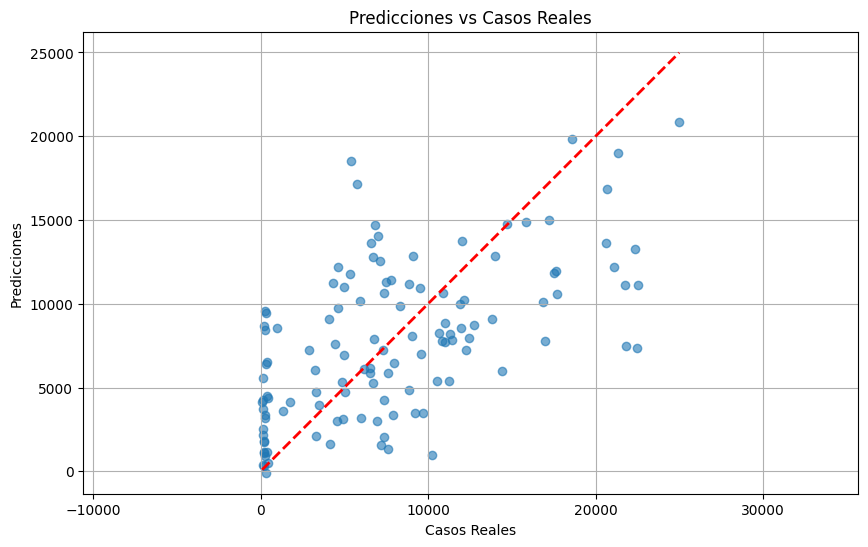

In [6]:
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'hidden_layer_sizes': [(50,), (25,)],
    'learning_rate_init': [0.001, 0.0001],
    'activation': ['relu'],  # Funciones de activación
    'alpha': [0.001],
    'batch_size': ['auto', 32],
    'solver': ['adam']
}
grid_search = GridSearchCV(mlp_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

best_mlp = grid_search.best_estimator_
best_predictions = best_mlp.predict(X_val)

best_mse = mean_squared_error(y_val, y_pred)
best_rmse = np.sqrt(best_mse)
best_mae = mean_absolute_error(y_val, y_pred)
best_r2 = r2_score(y_val, y_pred)

print("Best RMSE: ", best_rmse)
print("Best MAE: ", best_mae)
print("Best R²: ", best_r2)

y_pred = best_mlp.predict(X_val)
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linewidth=2, linestyle='--')  # Línea de referencia
plt.xlabel('Casos Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Casos Reales')
plt.axis('equal')
plt.grid()
plt.show()

#Save model
import joblib
joblib.dump(best_mlp, "mlp.pkl")
mlp_loaded = joblib.load("mlp.pkl")

#Save pipeline
joblib.dump(pca_pipeline, 'pipeline.joblib')
pipeline_loaded = joblib.load('pipeline.joblib')

In [7]:
import tensorflow as tf
from tensorflow import keras
input_shape = X_train.shape[1:]

model=keras.Sequential([
    keras.layers.Input(shape=input_shape),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

mse_test=model.evaluate(X_val, y_val)
X_new=X_val[:3]
val_predictions=model.predict(X_val)

print("\nValidation performance:")
print(f"MAE: {mean_absolute_error(y_val, val_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_val, val_predictions):.2f}")
print(f"R²: {r2_score(y_val, val_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, val_predictions)):.2f}")

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 118606280.0000 - val_loss: 104432040.0000
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113202032.0000 - val_loss: 104431536.0000
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118839024.0000 - val_loss: 104431056.0000
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 114301216.0000 - val_loss: 104430592.0000
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 113969400.0000 - val_loss: 104430104.0000
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124373344.0000 - val_loss: 104429600.0000
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 121819192.0000 - val_loss: 104429128.0000
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119128176.0000 - val_loss: 104428640.0000
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127568872.0000 - val_loss: 104428144.0000
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115327224.0000 - val_loss: 104427632.000

In [8]:
!pip install scikeras
from tensorflow import keras
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
from sklearn.metrics import mean_squared_error
import numpy as np

# Model building function with learning_rate passed to it
def build_model(n_hidden=1, n_neurons=30, learning_rate=1e-5, input_shape=[12]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(shape=input_shape))

    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))

    model.add(keras.layers.Dense(1))

    # Use the learning_rate in the optimizer
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)

    return model

# Define the Keras regressor (do not pass learning_rate here)
keras_reg = KerasRegressor(build_model, input_shape=[12], learning_rate=0.0007611516415334506, n_hidden=0, n_neurons=15)

# Define the parameter distribution for RandomizedSearchCV
param_distribs = {
    "n_hidden": [0, 1],
    "n_neurons": np.arange(1, 5)  # learning_rate is part of the model build
}

# Initialize RandomizedSearchCV with KerasRegressor
rnd_search_cv = RandomizedSearchCV(
    keras_reg, param_distribs, n_iter=10, cv=3, verbose=1, random_state=42
)

# Fit RandomizedSearchCV with early stopping integrated inside the fit method
rnd_search_cv.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val),
                  callbacks=[EarlyStopping(patience=10)])

# Best parameters from RandomizedSearchCV
print("Best parameters found: ", rnd_search_cv.best_params_)

# Evaluate the best model from the search
y_pred = rnd_search_cv.predict(X_val)
mse_test = mean_squared_error(y_val, y_pred)
print("Test MSE after RandomizedSearchCV: ", mse_test)'''


'!pip install scikeras\nfrom tensorflow import keras\nfrom keras.callbacks import EarlyStopping\nfrom scikeras.wrappers import KerasRegressor\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import reciprocal\nfrom sklearn.metrics import mean_squared_error\nimport numpy as np\n\n# Model building function with learning_rate passed to it\ndef build_model(n_hidden=1, n_neurons=30, learning_rate=1e-5, input_shape=[12]):\n    model = keras.models.Sequential()\n    model.add(keras.layers.InputLayer(shape=input_shape))\n\n    for _ in range(n_hidden):\n        model.add(keras.layers.Dense(n_neurons, activation="relu"))\n\n    model.add(keras.layers.Dense(1))\n\n    # Use the learning_rate in the optimizer\n    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)\n    model.compile(loss="mse", optimizer=optimizer)\n\n    return model\n\n# Define the Keras regressor (do not pass learning_rate here)\nkeras_reg = KerasRegressor(build_model, input_shape=[12], lear